In [1]:
from ultralytics import YOLO

model = YOLO("runs/segment/train2/weights/best.pt")

In [4]:
# dir(model)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def imread(filepath):
    return cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)


def imwrite(filepath, img):
    cv2.imwrite(filepath, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))


def imshow_numpy(img, figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img)
    plt.show()


In [4]:
img = imread('../../data/datasets/field-classification/junior/2025-03-02-21-21-37-925062-field.jpg')

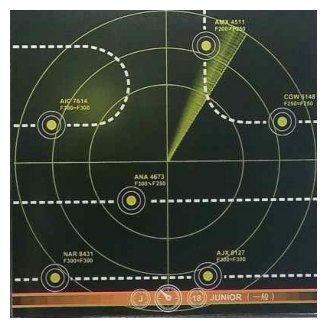

In [5]:
imshow_numpy(img)

In [6]:
h, w, _ = img.shape
hs, ws = h / 4, w / 4

imgs_cells = []
for i in range(16):
    r, c = i // 4, i % 4
    img_cell = img[round(r * hs):round((r + 1) * hs), round(c * ws):round((c + 1) * ws)]
    imgs_cells.append(img_cell)

In [7]:
results = model.predict(imgs_cells)


0: 640x640 1 road, 9.4ms
1: 640x640 1 road, 9.4ms
2: 640x640 2 roads, 9.4ms
3: 640x640 (no detections), 9.4ms
4: 640x640 2 roads, 9.4ms
5: 640x640 1 road, 9.4ms
6: 640x640 1 road, 9.4ms
7: 640x640 2 roads, 9.4ms
8: 640x640 1 road, 9.4ms
9: 640x640 2 roads, 9.4ms
10: 640x640 2 roads, 9.4ms
11: 640x640 1 road, 9.4ms
12: 640x640 2 roads, 9.4ms
13: 640x640 1 road, 9.4ms
14: 640x640 3 roads, 9.4ms
15: 640x640 1 road, 9.4ms
Speed: 6.2ms preprocess, 9.4ms inference, 29.9ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
def make_result_mask(yolo_seg_result):
    mask_sum = np.zeros((640, 640, 1))
    for o in range(len(yolo_seg_result)):
        for i in range(len(yolo_seg_result[o].masks)):
            mask = yolo_seg_result[o].masks[i].data
            mask = mask.detach().cpu().numpy().transpose((1, 2, 0))
            mask_sum = np.maximum(mask_sum, mask)
    return mask_sum

masks = []
for result in results:
    mask = make_result_mask(result)
    masks.append(mask)


In [9]:
masks[0].shape

(640, 640, 1)

In [14]:
np.concat((masks[0], masks[0], masks[0]), axis=-1).shape

(640, 640, 3)

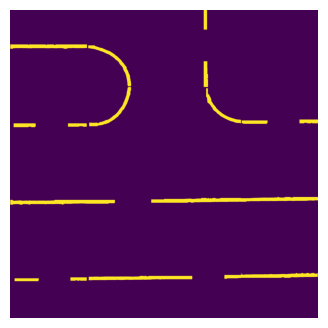

In [65]:
m0 = np.hstack(masks[:4])
m1 = np.hstack(masks[4:8])
m2 = np.hstack(masks[8:12])
m3 = np.hstack(masks[12:16])
m16 = np.vstack((m0, m1, m2, m3))
imshow_numpy(m16)

In [18]:
results[0][0].orig_img.shape

(403, 401, 3)